# Business case

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# Import Libraries

In [1]:
# to manipulate data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split data into train and test
from sklearn.model_selection import train_test_split

# to create a decision tree
from sklearn.tree import DecisionTreeClassifier

# to create ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# to create extreme gradient boosting
from xgboost import XGBClassifier


# to evaluate models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to tune  models
from sklearn.model_selection import GridSearchCV


#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import Dataset

In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/easyvisa-dataset/EasyVisa.csv


In [3]:
visa = pd.read_csv('/kaggle/input/easyvisa-dataset/EasyVisa.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

# Overview and Sanity Check

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.shape

(25480, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [9]:
# checking for null values
data.duplicated().sum()

0

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The dataset has 25480 rows and 12 columns 
- There are no missing values in the dataset
- There are no duplicate values in the dataset
- `no_of_employees`, ` yr_of_estab`, and `prevailing_wage` are numeric features while rest are objects
- the no of employees has a mean of 5,667 and median of 2,109. This indicates that the distribution is skewed
- there are negative values in the no of employees which could be an error
- yr of estab ranges from 1800 to 2016
- prevailing wage ranges from 2 to 319,210 and distribution is skewed
- The most popular continent is Asia
- The most popular educational level is Bachelor

-------------------------------------------------------------------------------------------------

### 1 Investigate the negative values in the number of employees

In [11]:
# Understand how many cases we have
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

- since there cannot be that the number of employees in a company is negative, we will consider it as a data entry error
- we have 33 cases like this
- we will take the absolute value of those values

In [12]:
# convert the negative values to their absolute values
data['no_of_employees'] = abs(data['no_of_employees'])

### 2 Visualizing the unique values in each categorical column to see if there are any strange values

In [13]:
# categorial columns
obj_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in obj_col:
    print(data[column].value_counts(True))
    print("-" * 50)

case_id
EZYV01       0.000039
EZYV16995    0.000039
EZYV16993    0.000039
EZYV16992    0.000039
EZYV16991    0.000039
               ...   
EZYV8492     0.000039
EZYV8491     0.000039
EZYV8490     0.000039
EZYV8489     0.000039
EZYV25480    0.000039
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, 

- case id can be removed as it is not needed
- 66% of the applications are from Asians 
- 40% of the applicants have a bachelor's degree
- 58% of the applicants have job experience 
- 88% of the applicants do not require job training
- 28% of the applicants have their worksite in the Northeast region of the US
- 90% of the applicants have a yearly unit of wage
- 89% of the visa applications are having a full-time job positions
- 66% of the case status  are certified
- The target variable is imbalanced 

In [14]:
data.drop(["case_id"], axis=1, inplace=True)

# Exploratory Data Analysis

## Univariate Analysis

In [15]:
# for numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### 1 Observations on number of employees

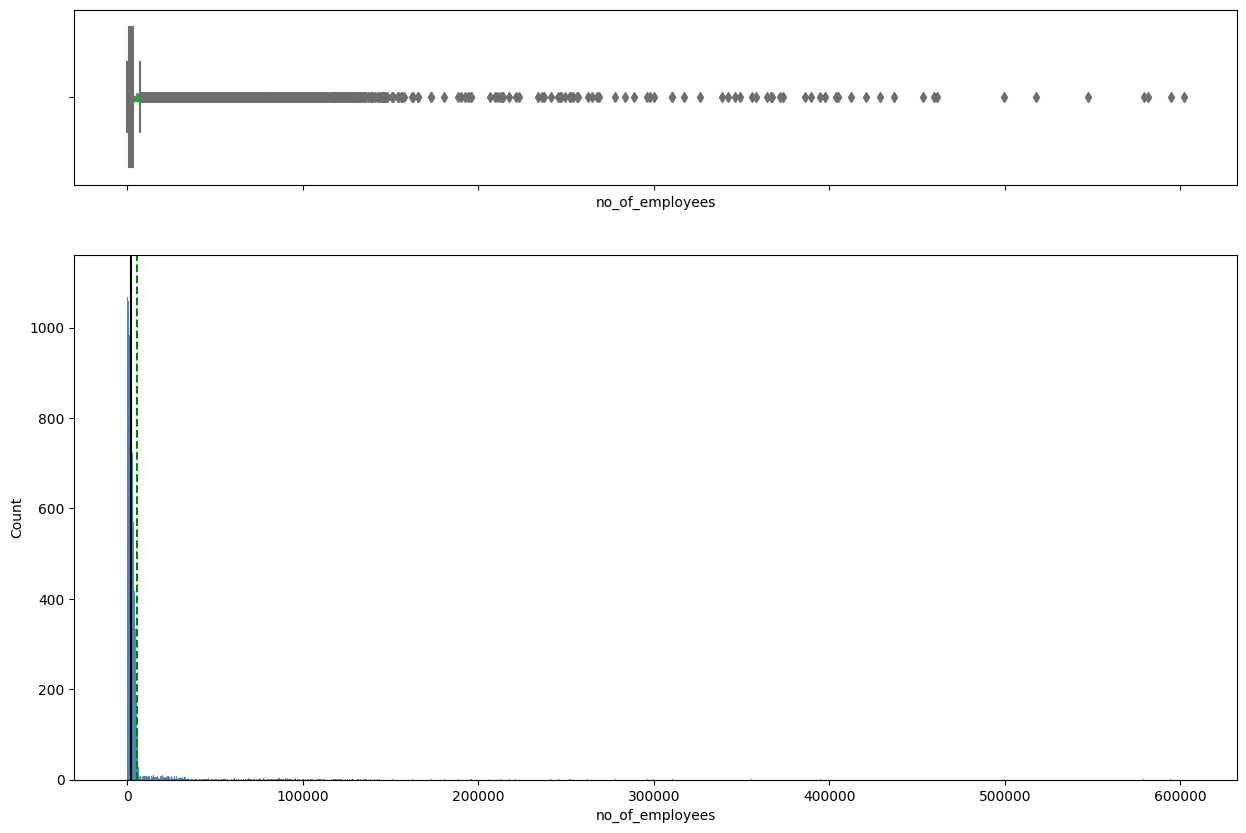

In [17]:
histogram_boxplot(data,'no_of_employees')

- the distribution of the number of employees is extremly skewed to the right
- It can be implied that the dataset has small companies, medium companies, and large international companies

### 2 Observations on prevailing wage

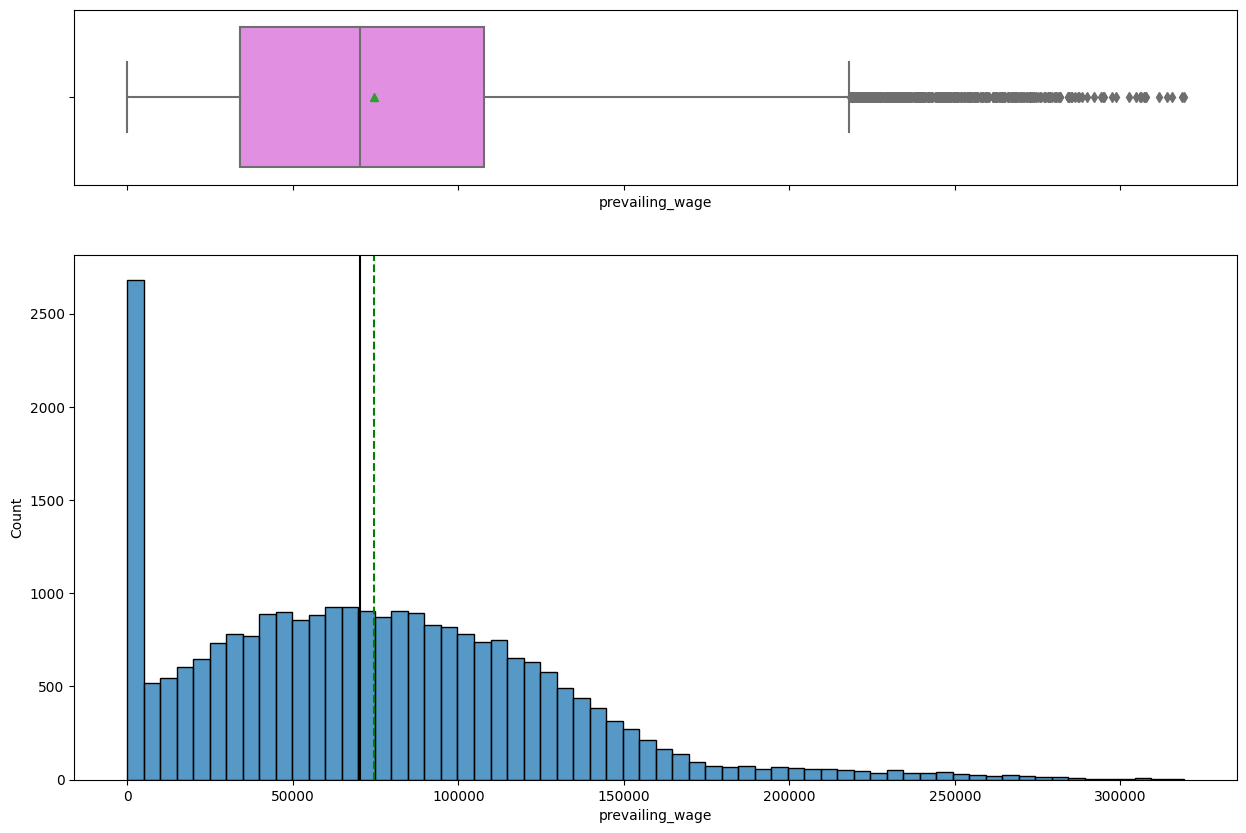

In [18]:
histogram_boxplot(data,'prevailing_wage')

- the distribution of the prevailing wage is skewed to the right
- there is a huge difference between wages among applicants
- there are applicants whose wage is more than 150,000
- there are applicants whose wage is around 0 and there are alot of them, we might need to check this
- it could be that some wages are entered as hourly base while others as yearly base

In [19]:
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

unit_of_wage
Hour    176
Name: count, dtype: int64

- it looks like the small wages are actually hourly based

### 3 Observations on continent

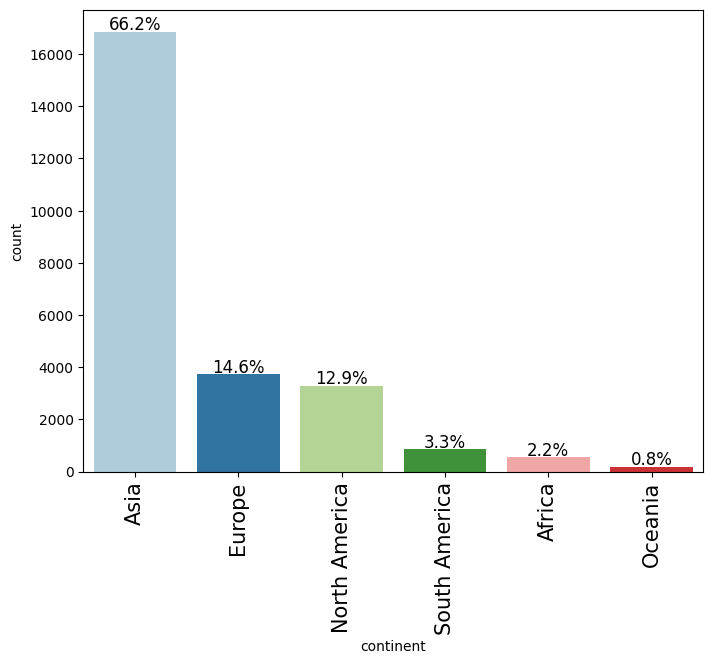

In [20]:
labeled_barplot(data, "continent", perc=True)

- 66% are coming from Asia, 15% are coming from EU, and 13% are coming from North Amercia

### 4 Observations on education of employee

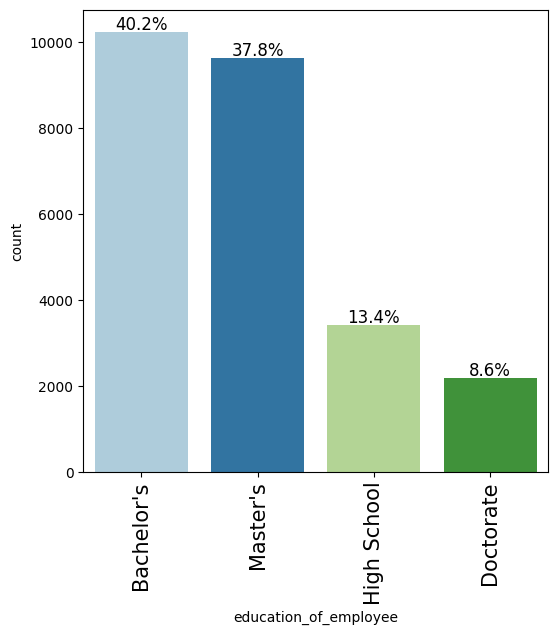

In [21]:
labeled_barplot(data, "education_of_employee", perc=True)

* 40.2% of the applicants have a bachelor's degree, followed by 37.8% having a master's degree.
* 8.6% of the applicants have a doctorate degree.

### 5 Observations on job experience

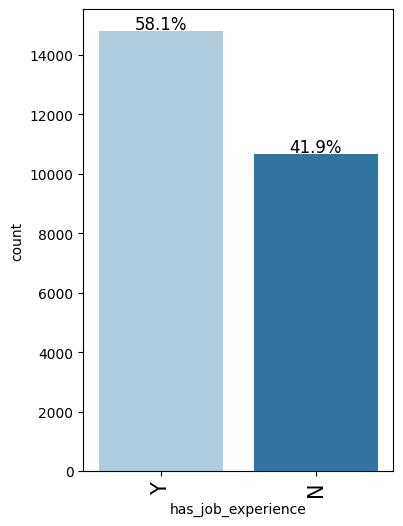

In [22]:
labeled_barplot(data, "has_job_experience", perc=True)

- 58.1% of the applicants have job experience

### 6 Observations on job training

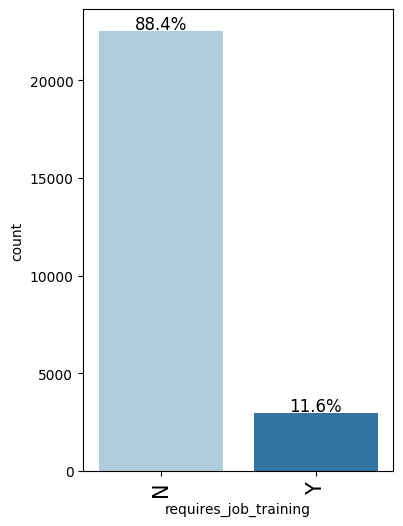

In [23]:
labeled_barplot(data, "requires_job_training", perc=True)

- 88.4% of the applicants do not require any job training

### 7 Observations on region of employment

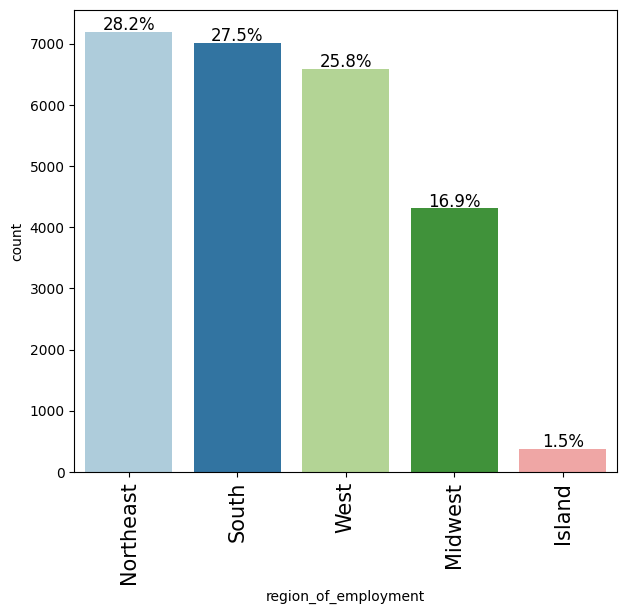

In [24]:
labeled_barplot(data, "region_of_employment", perc=True)

- Northeast, South, and West are equally distributed
- The Island regions have only 1.5% of the applicants

### 8 Observations on unit of wage

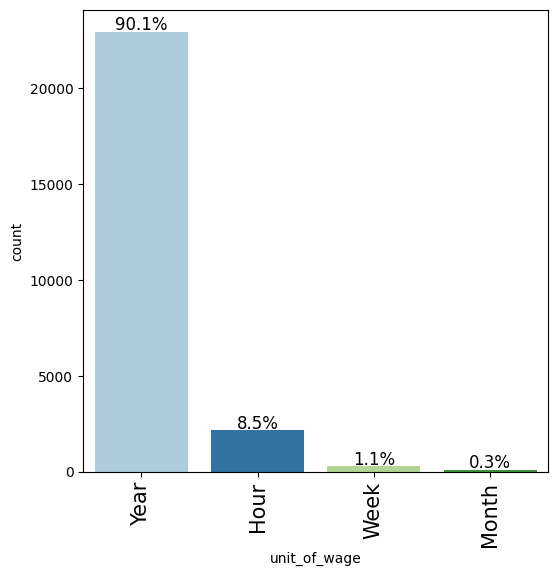

In [25]:
labeled_barplot(data, "unit_of_wage", perc=True)

- 90.1% of the applicants have a yearly unit of the wage

### 9 Observations on case status

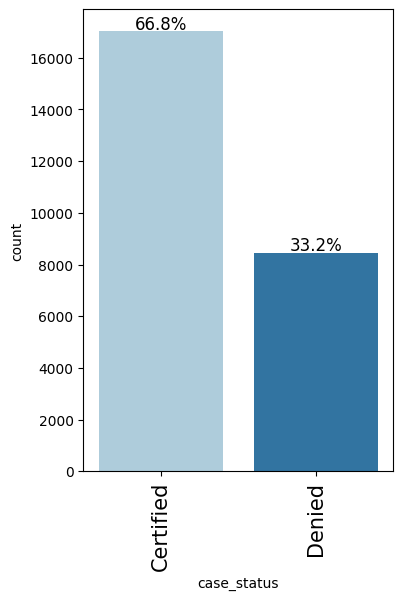

In [26]:
labeled_barplot(data, "case_status", perc=True)

* 66.8% of the visas were certified.

## Bivariate Analysis

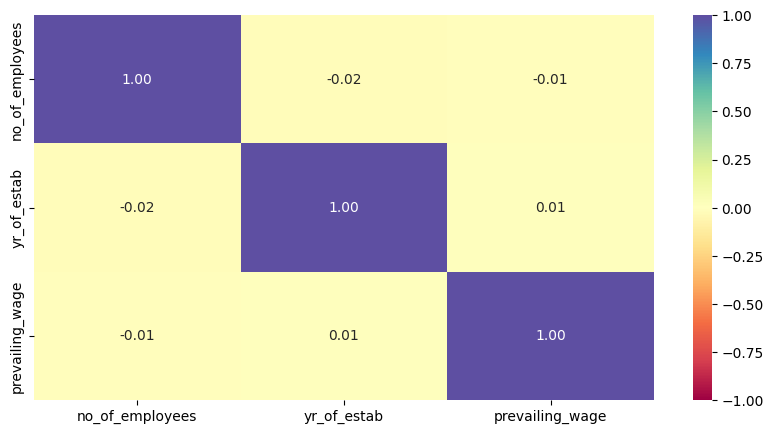

In [27]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- we cannot see any correlation between the numerical variables

In [28]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [29]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### 1 Education vs case status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


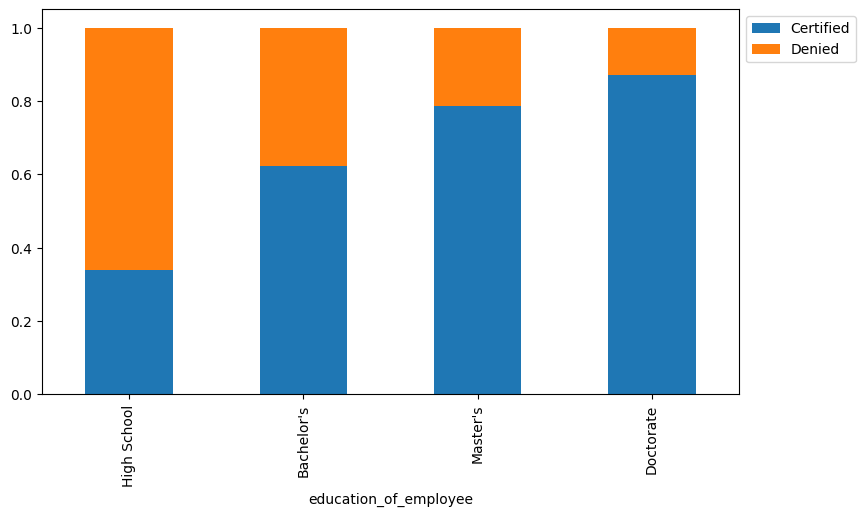

In [30]:
stacked_barplot(data, "education_of_employee", "case_status")

- The higher the education, the more chance to get certified

### 2 education vs region

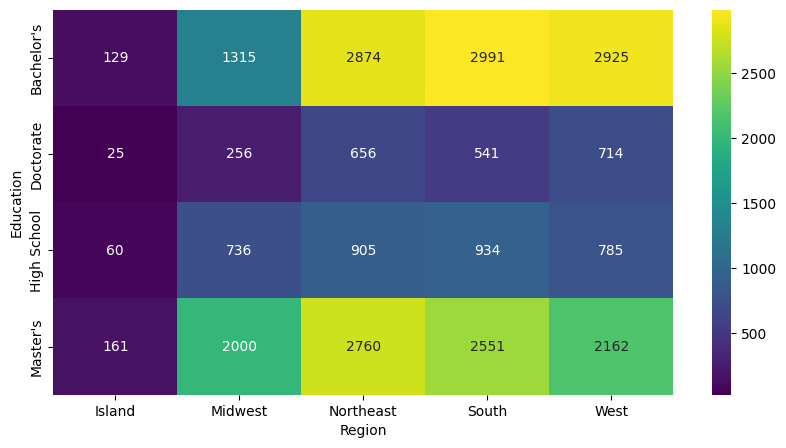

In [31]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
* The requirement for Bachelor's is mostly in South region, followed by West region.
* The requirement for Master's is most in Northeast region, followed by South region.
* The requirement for Doctorate's is mostly in West region, followed by Northeast region.

### 3 region vs case status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


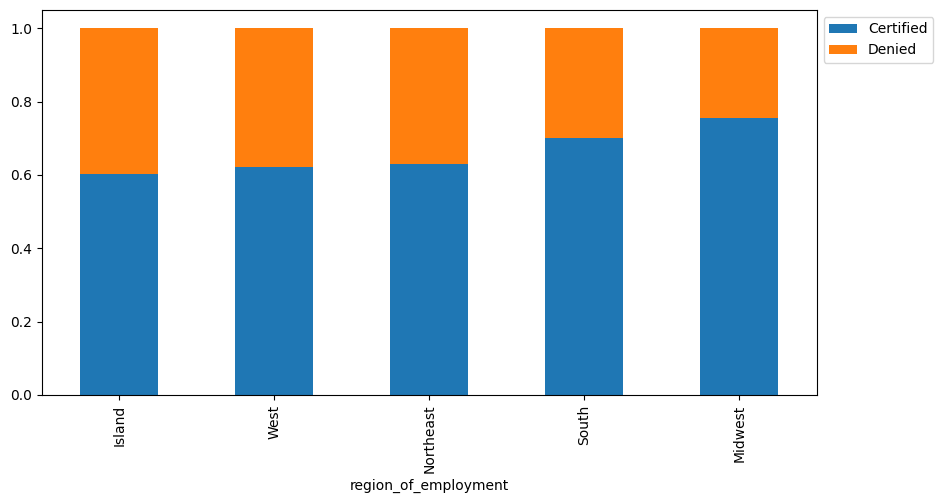

In [32]:
stacked_barplot(data, "region_of_employment", "case_status")

- Midwest has the highest positive case chance
- Island, in the opposite side, has the lowestpositive case chance

### 4 continent vs case status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


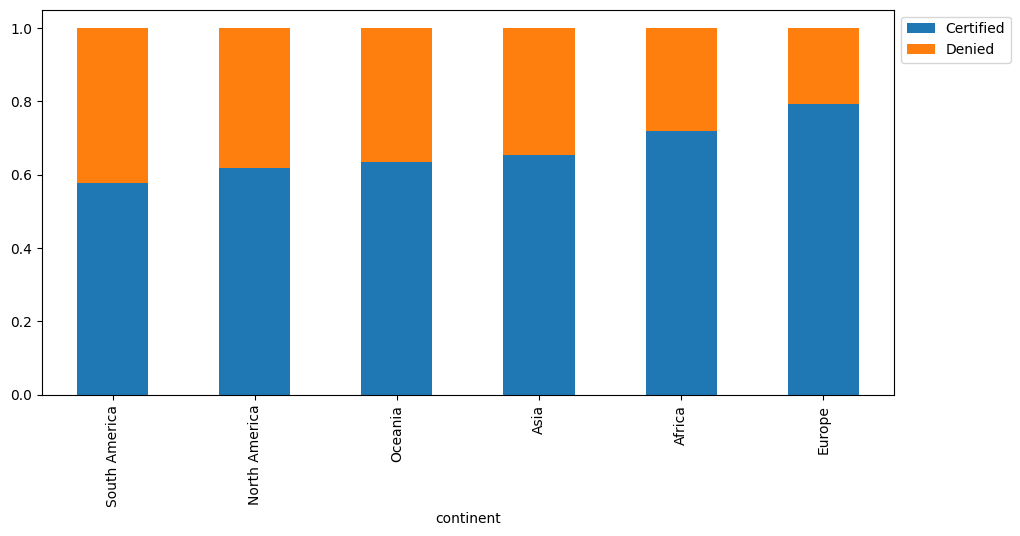

In [33]:
stacked_barplot(data, "continent", "case_status")

- EU has the highest chance of getting certified, while South America has the loest chance

### 5 job experience vs case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


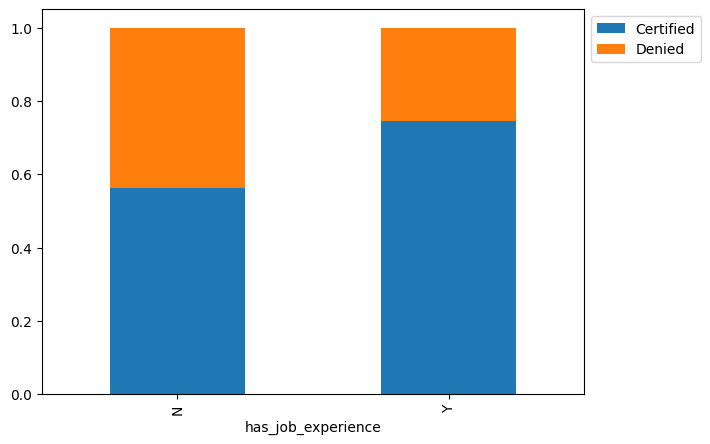

In [34]:
stacked_barplot(data, "has_job_experience", "case_status")

- applicants with job experience have more chances of getting certified

### 6 job experience vs training required

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


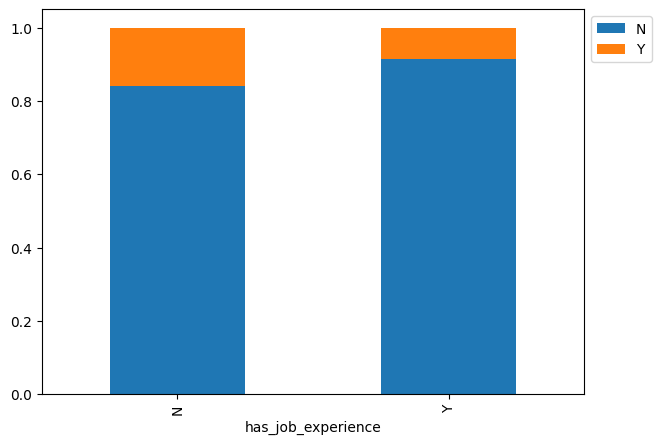

In [35]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

- if the applicant has a job experience, they are less likely to require training

### 7 wage vs case status

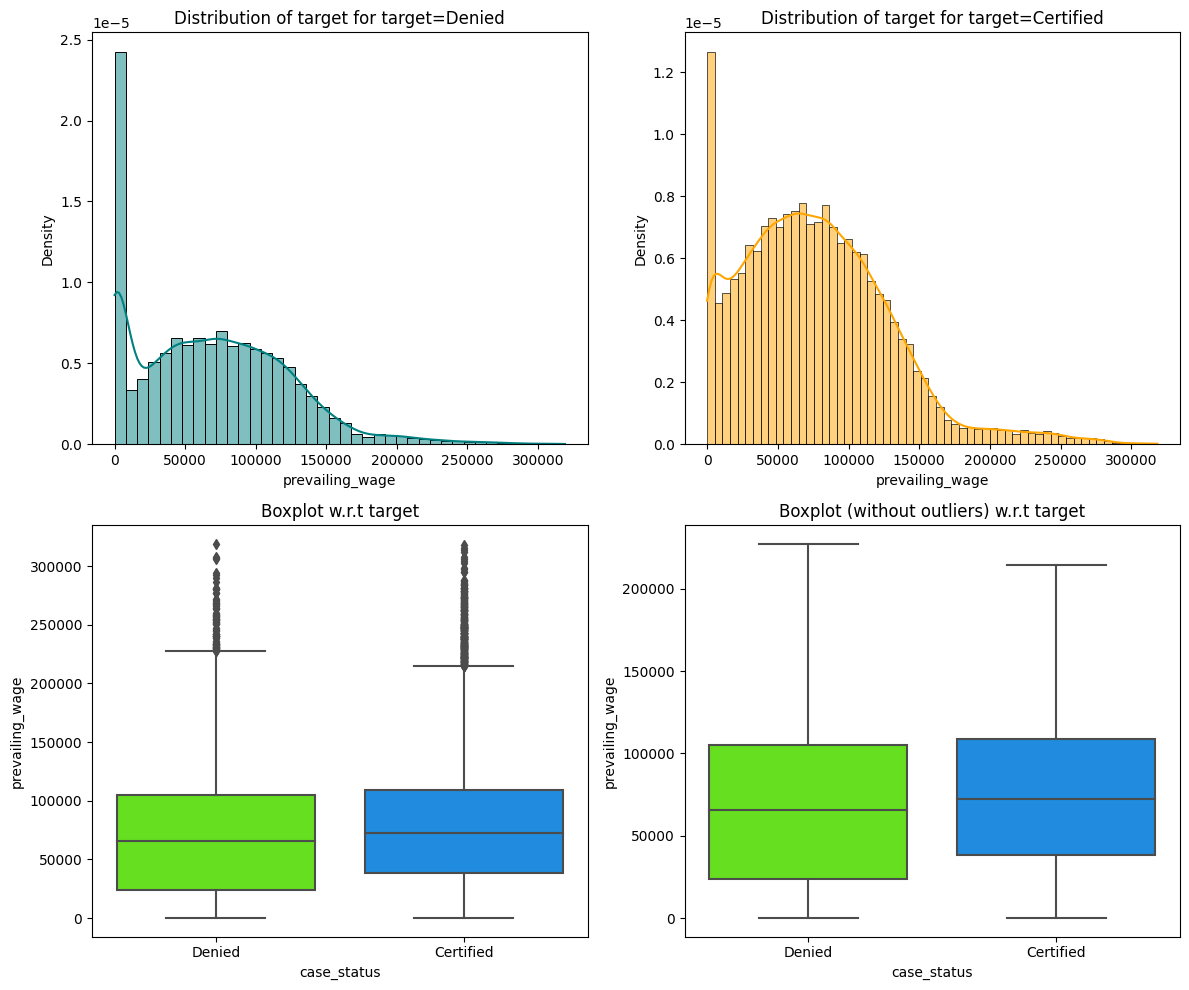

In [36]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

* The median prevailing wage for the certified applications is slightly higher as compared to denied applications.

### 8 region vs wage

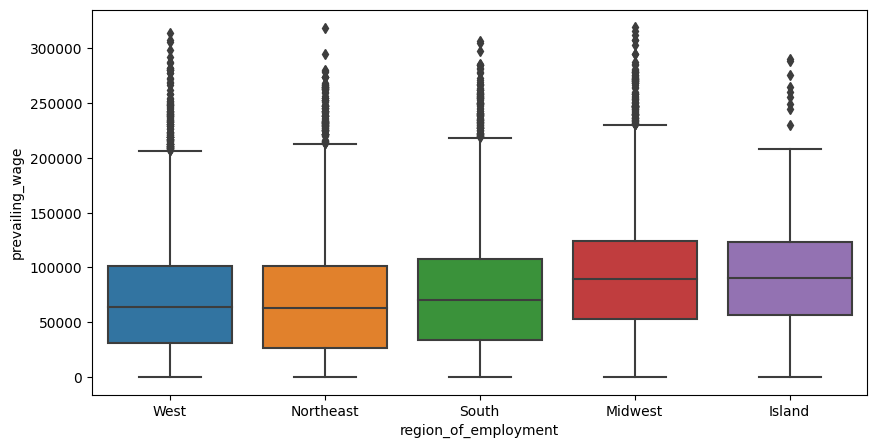

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

- prevailing wages is higher in Midwest and Island

### 9 unit of wage vs case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


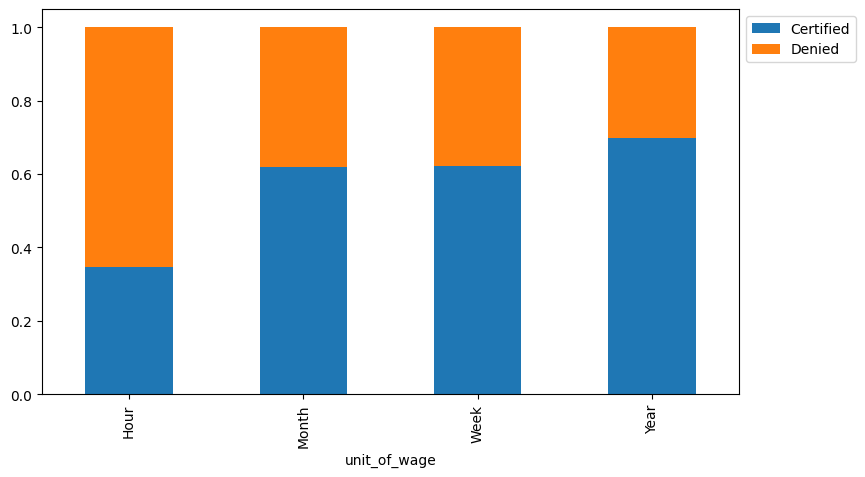

In [39]:
stacked_barplot(data, "unit_of_wage", "case_status")

- Hourly waged applicants are more likely to get denied while yearly are more likley to get certified

# Data Pre-processing

### Outlier Check

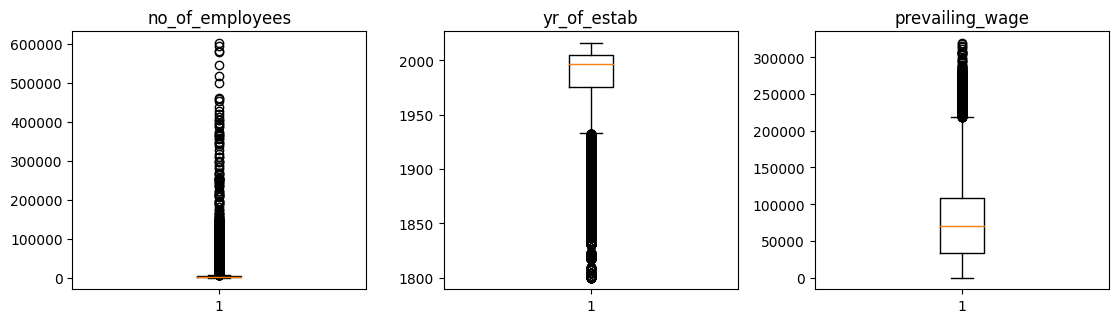

In [40]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Although there are outliers, we will keep them as they have a valuable input

# Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [41]:
# encode case status, where certified is 1, denied is 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [42]:
# split to train and test
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

# create dummy varialbes for categories
X = pd.get_dummies(X, drop_first=True)

In [43]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [44]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


# Model evaluation criterion

**Model can make wrong predictions as**:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

**Which case is more important?** 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 


**How to reduce the losses?**

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use ` balanced class weights`  so that model focuses equally on both classes.

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [46]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

In [47]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

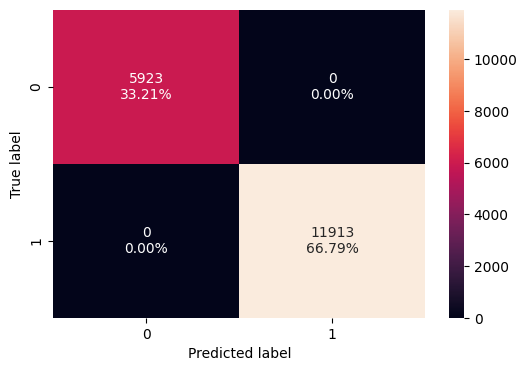

In [48]:
confusion_matrix_sklearn(model, X_train, y_train)

In [49]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


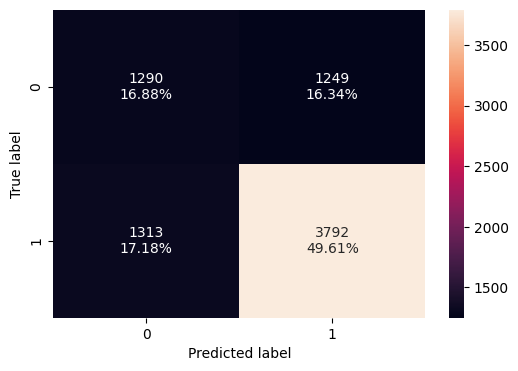

In [50]:
confusion_matrix_sklearn(model, X_test, y_test)

In [51]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


- the decision tree is overfitting

### Hyperparameter Tuning - Decision Tree

In [52]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

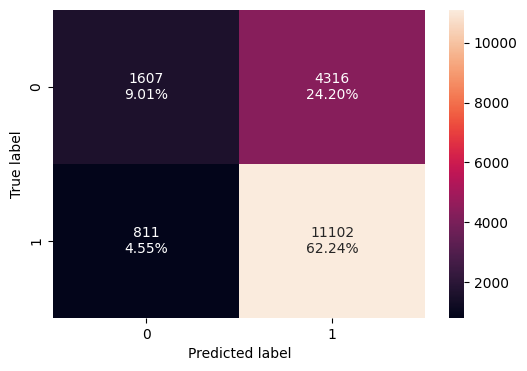

In [53]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [54]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


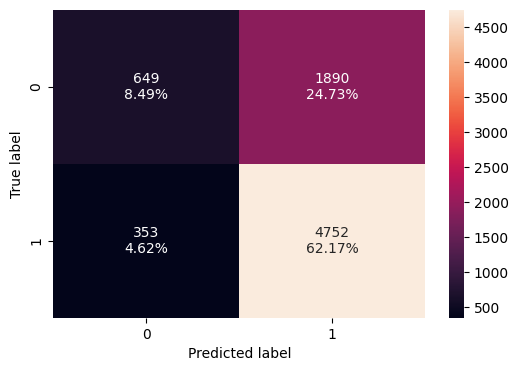

In [55]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [56]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


- The model is a good fit and not suffering from overfitting and it can be generalized

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [57]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

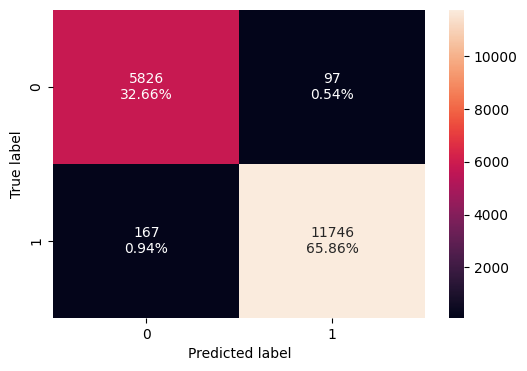

In [58]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [59]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

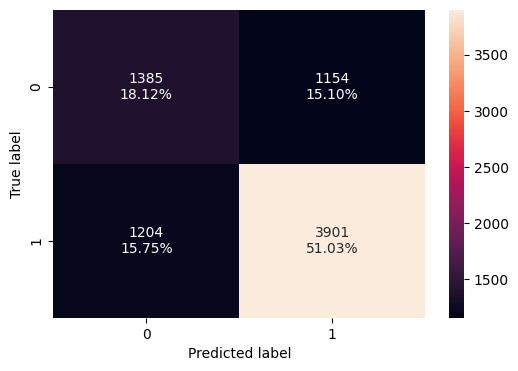

In [60]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [61]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


- The bagging classifier is also overfitting

### Hyperparameter Tuning - Bagging Classifier

In [62]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

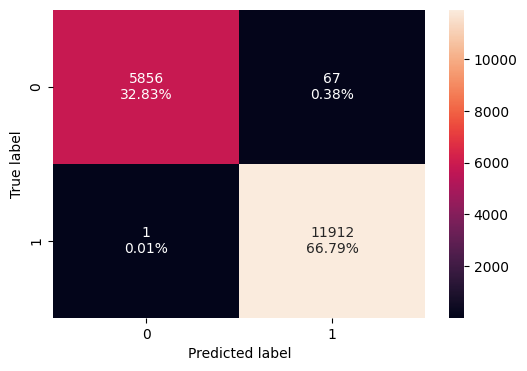

In [63]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [64]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


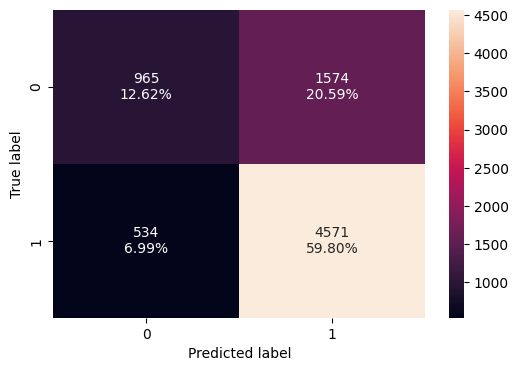

In [65]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [66]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


- the bagging calssifered is still overfitting even after tuning

### Random Forest

In [67]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

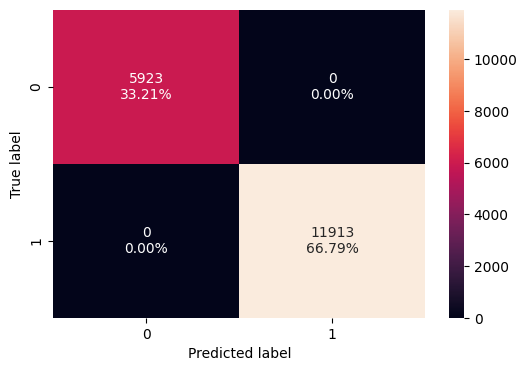

In [68]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [69]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


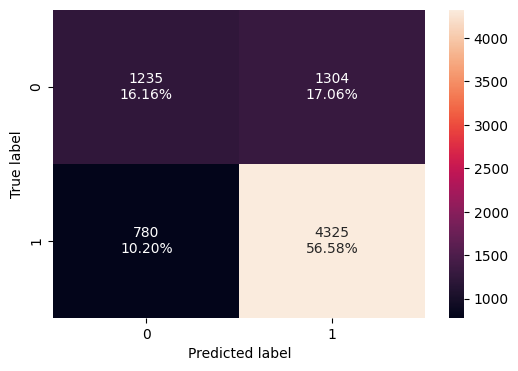

In [70]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [71]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


- random forest is overfitting 

### Hyperparameter Tuning - Random Forest

In [72]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

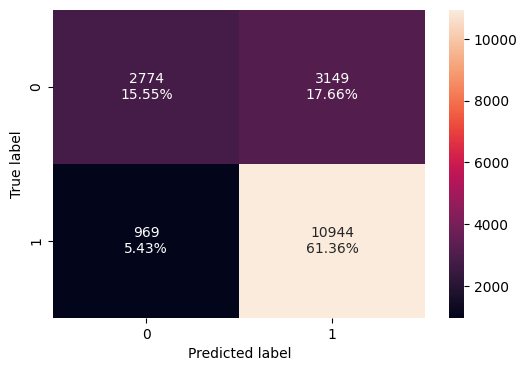

In [73]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [74]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


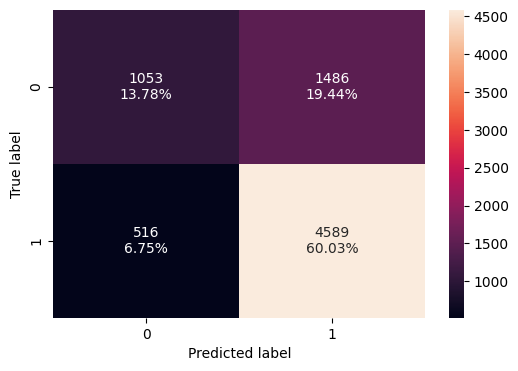

In [75]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [76]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


- After hyperparameter tuning the model performance has generalized.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [77]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

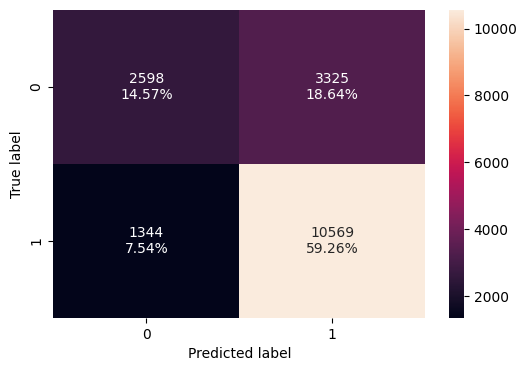

In [78]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [79]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


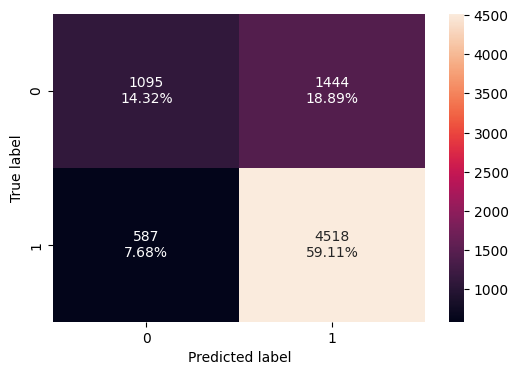

In [80]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [81]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


- The model is giving a generalized performance

### Hyperparameter Tuning - AdaBoost Classifier

In [82]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

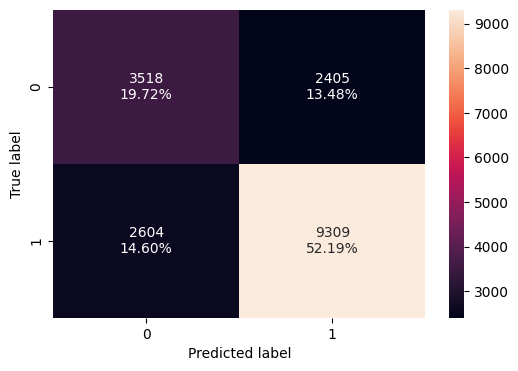

In [83]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [84]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719163,0.781415,0.79469,0.787997


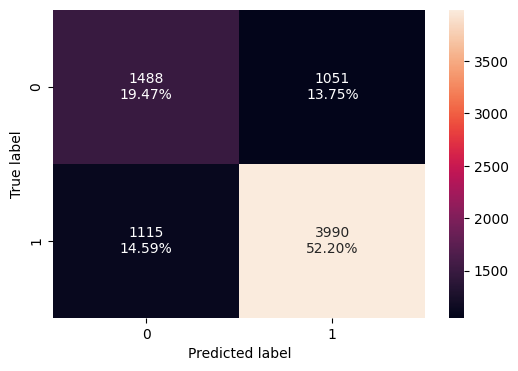

In [85]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [86]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.716641,0.781587,0.79151,0.786517


- After tuning the F1 score has reduced.
- The recall of the model has reduced but the precision has improved.

### Gradient Boosting Classifier

In [87]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

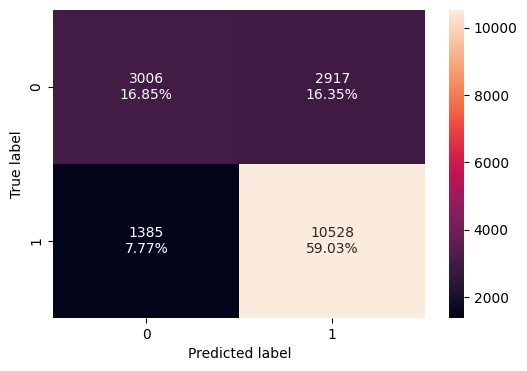

In [88]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [89]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


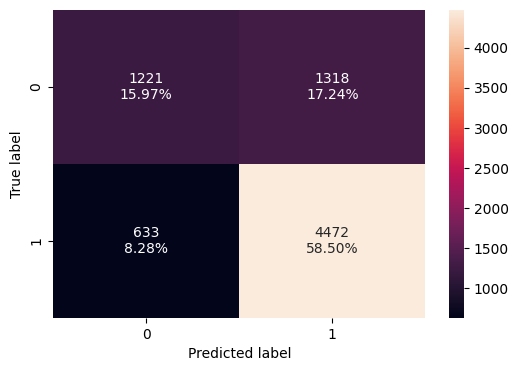

In [90]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [91]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


- The model is giving a good and generalized performance
- We are getting the F1 score of 0.83 and 0.82 on the training and test set

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250, 300],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

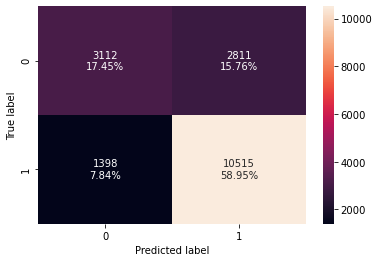

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


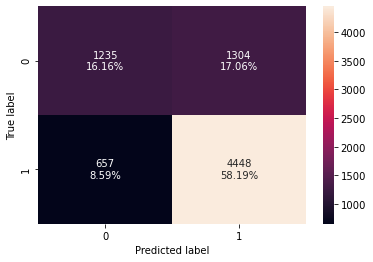

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


- F1 is less after hypermarater tunning

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### Checking model performance on training set

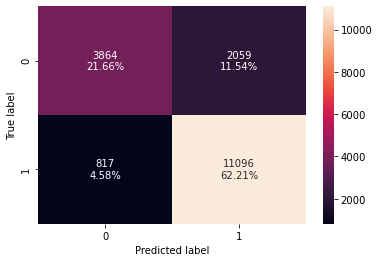

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


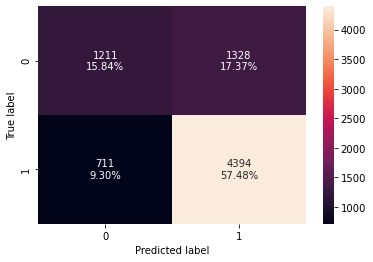

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


- the XGB seems to be also overfitting

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

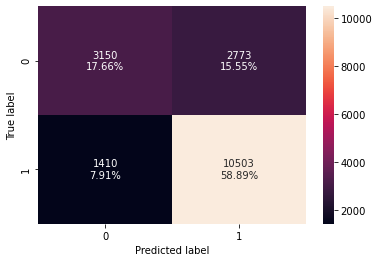

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765474,0.881642,0.791127,0.833935


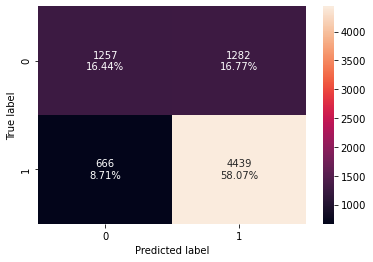

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86954,0.775913,0.820063


- XGBoost model after tuning is giving a good and generalized performance

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=Tru...
                                                 

#### Checking model performance on training set

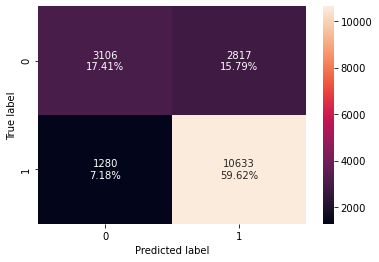

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.770296,0.892554,0.790558,0.838465


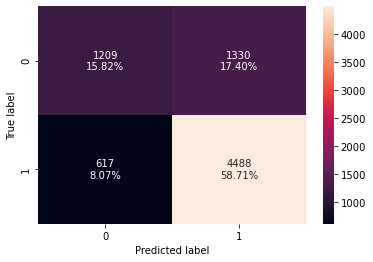

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74529,0.879138,0.771399,0.821752


* Stacking model has also given a good and generalized performance.
* The performance is comparable to the XGBoost model.
* We have received F1 scores of 0.83 and 0.81 on the training and test set, respectively.

## Model Comparison and Final Model Selection

**Comparing all models**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_estimator_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.712548,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.719163,0.758802,0.764017,0.838753,0.765474,0.770296
Recall,0.931923,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781415,0.883740,0.882649,0.931419,0.881642,0.892554
Precision,0.720067,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.794690,0.783042,0.789059,0.843482,0.791127,0.790558
F1,0.812411,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.787997,0.830349,0.833234,0.885272,0.833935,0.838465


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_estimator_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.706567,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716641,0.744767,0.743459,0.733255,0.745160,0.745290
Recall,0.930852,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781587,0.876004,0.871303,0.860725,0.869540,0.879138
Precision,0.715447,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791510,0.772366,0.773296,0.767913,0.775913,0.771399
F1,0.809058,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786517,0.820927,0.819379,0.811675,0.820063,0.821752


- Tuned Random Forest model is performing very well
- We will use tuned random forest as the final model


### Important features of the final model

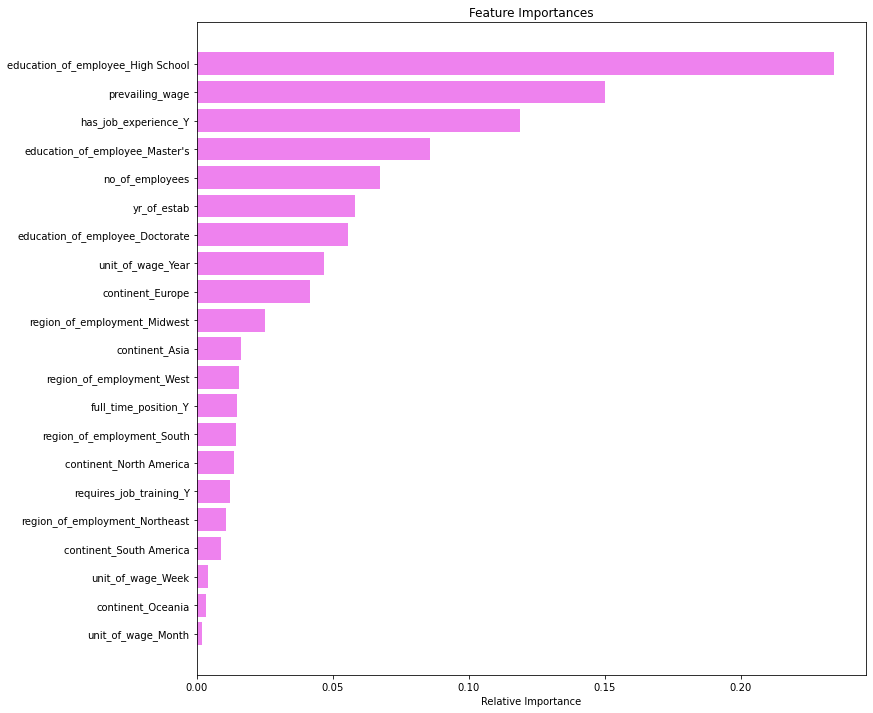

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- the top three important features to look for while certifying a visa are -Education of the employee, Job experience, and Prevailing Wage.

## Actionable Insights and Recommendations

**The profile of the applicants for whom the visa status can be approved:**

**the best fit porfile is:**
- `Education level` - (Higher education the better) At least has a Bachelor's degree - Master's and doctorate are preferred
- `Job Experience` -  Should have some job experience. 
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 72k. 


**Secondary information to look at:**

- `Unit of Wage`    - Applicants having a yearly unit of wage. 
- `Continent`       - Applicants from Europe, Africa, and Asia have higher chances of visa certification.
- `Region of employment` - Our analysis suggests that the applications to work in the Mid-West region have more chances of visa approval. The approvals can also be made based on requirement of talent, from our analysis we see that:
    * The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
    * The requirement for Bachelor's is mostly in South region, followed by West region.
    * The requirement for Master's is most in Northeast region, followed by South region.
    * The requirement for Doctorate's is mostly in West region, followed by Northeast region.
    
    
**The profile of the applicants for whom the visa status can be denied:**

**Primary information to look at:**
- `Education level` - Doesn't have any degree and has completed high school.
- `Job Experience` - Doesn't have any job experience. 
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 65k. 


**Secondary information to look at:**

- `Unit of Wage`    - Applicants having an hourly unit of wage. 
- `Continent`       - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.

-----------

* Additional information of employers and employees can be collected to gain better insights. Information such as:
   * Employers: Information about  the wage they are offering to the applicant, Sector in which company operates in, etc
   * Employee's: Specialization in their educational degree, Number of years of experience, etc

___